In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

In [18]:
def predict(X,w,y=None):
    y_pred = np.sign(np.dot(X,w))
    if y is None:
        return y_pred
    return y_pred, np.mean(y==y_pred)

def generate_weights():
    pts = np.random.uniform(-1, 1, (2, 2))
    d = pts[0] - pts[1]; m = -1.*d[1]/d[0]
    w = np.ones(3)
    w[1] = m
    w[0] = -1.*pts[0,1] - w[1]*pts[0,0]
    return w

def generate_dataset(N):
    X = np.ones((N,3)) # x0 = 1
    X[:,1:] = np.random.uniform(-1,1,(N,2))
    return X

def plot_dataset(X, y, w=None, show_line=False):
    
    # set the size
    plt.figure(figsize=[12,8])
    
    X_0 = X[np.where(y==-1)[0]]
    X_1 = X[np.where(y==1)[0]]
    plt.scatter(X_0[:,1], X_0[:,2], color='r',label='-1 class')
    plt.scatter(X_1[:,1], X_1[:,2], color='b',label='1 class')
    
    if show_line:
        x = np.linspace(-1, 1, 1e3)
        fx = -1.*w[1]/w[2]*x - w[0]/w[2]
        plt.plot(x,fx, color='black',label='hyperplane')
        
    plt.legend(loc='upper right')
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.title('2D, Linearly separable dataset for PLA')
    plt.show()

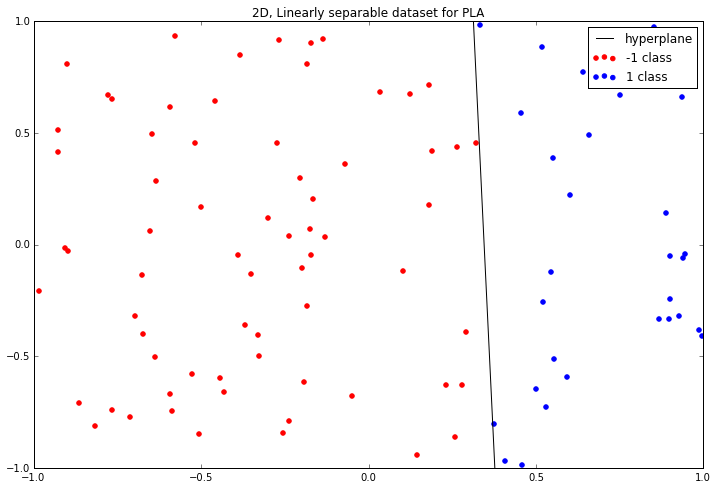

In [19]:
# create a 2D dataset
N = 100
X = generate_dataset(N)
w = generate_weights()
y = predict(X,w)

# plot dataset and line separating
plot_dataset(X,y,w=w,show_line=True)

In [25]:
# PLA
num_trials = 1000
N = 100
n_iters = [0]*num_trials

# repeat this experiment num_trials number of times and average
for i in range(num_trials):
    
    # generate a new dataset
    X = generate_dataset(N)
    w = generate_weights()
    y = predict(X,w)
    
    # use PLA to find a separating hyperplane, and count number of 
    # iterations
    w_ = np.zeros(3)
    y_pred, acc = predict(X, w_, y)
    n_iter = 0 
    
    # linearly separable, so it should eventually converge
    while acc != 1.:
        # pick a random misclassified point
        misclass_idxs = np.where(y != y_pred)[0]
        np.random.shuffle(misclass_idxs)
        misclass_idx = misclass_idxs[0]

        w_ = w_ + X[misclass_idx]*y[misclass_idx]
        y_pred, acc = predict(X, w_, y)
        n_iter += 1
    n_iters[i] = n_iter

print 'Average number of iterations: %.1f'%np.mean(n_iters)

Average number of iterations: 114.0


In [26]:
test_N = 100000
X_te = generate_dataset(test_N)
y_te = predict(X_te, w)
y_te_pred = predict(X_te, w_)
print 'Probability of misclassification: %.3f'%(np.mean(y_te != y_te_pred))

Probability of misclassification: 0.008
